
# **LSTM Cell**

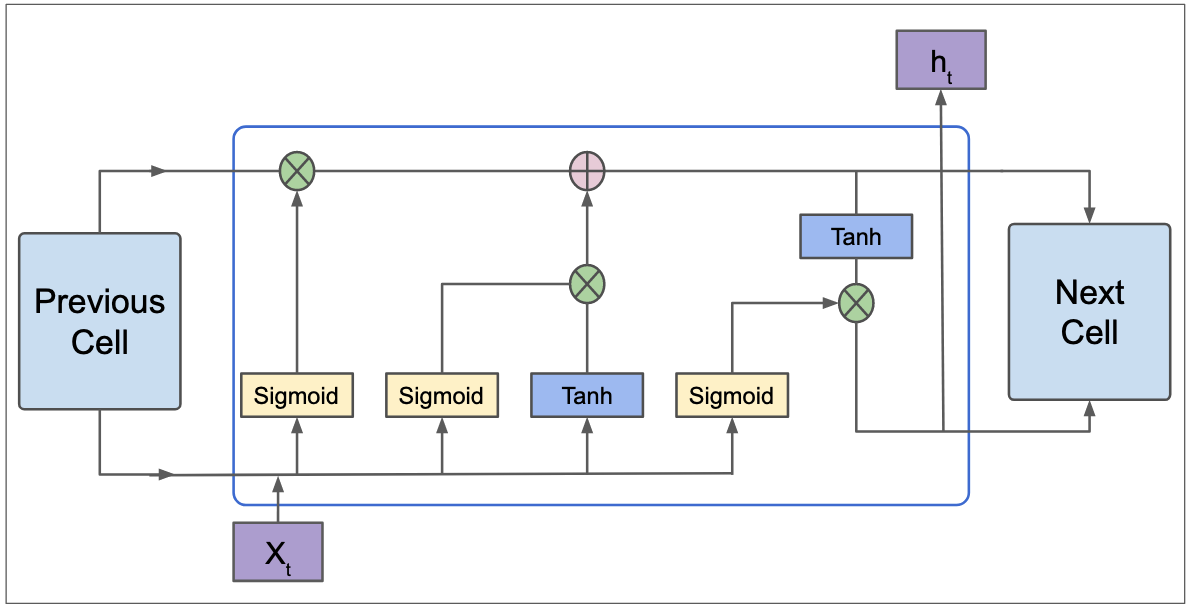

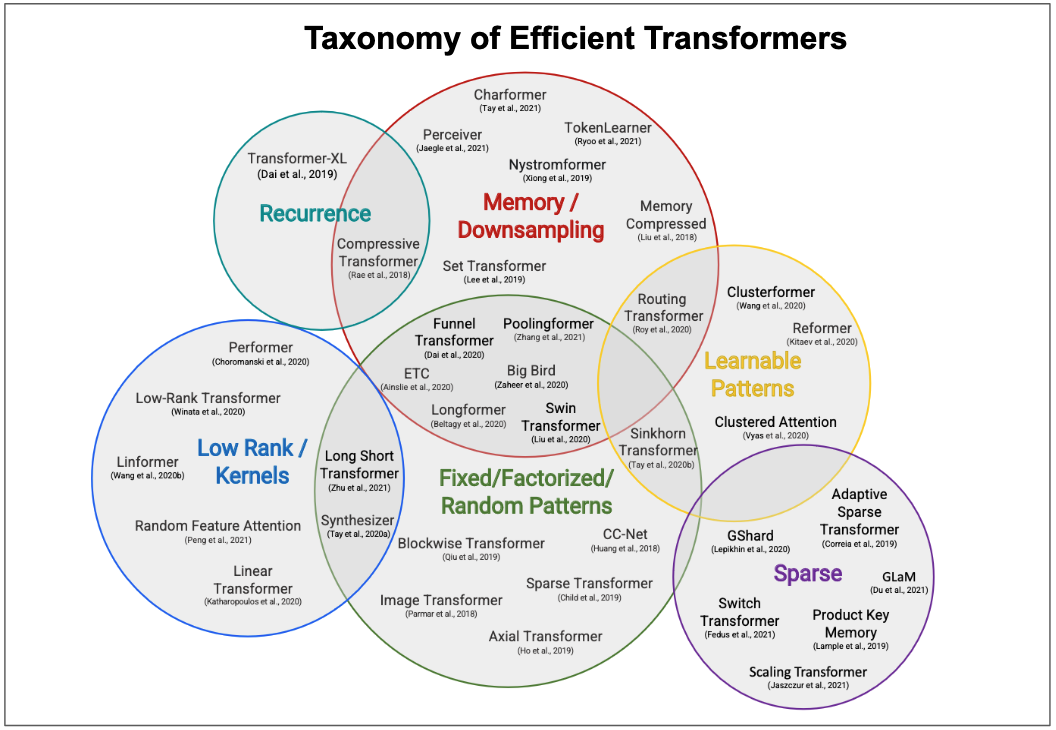

# Causal Language Modeling


However in self-supervised learning, LLMs employ the causal language modeling objective to acquire knowledge from any textual data without the explicit need for human-provided labels. Why is it called “causal”? Because the prediction at each step depends only on earlier steps in the sequence and not on future steps.

This process involves feeding a segment of the document to the model and asking it to predict the next word.

During the pre-training process, the network acquires substantial knowledge about language and grammar. We can then fine-tune the pre-trained model using a supervised approach for different tasks or a specific domain.

In contrast to other objectives like masked language modeling, where masked tokens are introduced in the input, the causal language modeling approach constructs sentences one word at a time. This key difference ensures that our model's performance is not adversely affected when dealing with real-world passages lacking masking tokens.

# MinGPT

https://github.com/karpathy/minGPT

#Decoding Methods
**1. Greedy Search**

Selects the token with the highest probability at each step.
Simplest method but can lead to repetitive or less optimal responses.

**2. Sampling**

Introduces randomness by selecting the next word based on its probability distribution.
Allows for more diverse output but can result in less coherent text.

**3. Beam Search**

Selects the top N candidate subsequent tokens with the highest probabilities at each step.
Reduces search space and produces more consistent results but can be slower and suboptimal.

**4. Top-K Sampling**

Narrows down the sampling pool to the top K most probable words.
Provides a balance between diversity and relevance.

**5. Top-p (Nucleus) Sampling**

Selects words from the smallest set of tokens whose cumulative probability exceeds a threshold P.
Offers fine-grained control over diversity and avoids rare or low-probability tokens.


#Parameters That Influence Text Generation
**1. Temperature**

Influences the randomness or determinism of generated text.
Low value makes output more focused, high value increases randomness.

**2. Stop Sequences**

Specific character sequences that halt text generation once they appear.
Guides length and structure of generated text.

**3. Frequency and Presence Penalties**

Used to discourage or encourage repetition of certain words.
Frequency penalty reduces likelihood of repeating frequently appeared tokens.
Presence penalty discourages repeating any token that has already appeared.



## **Optimized Decision Guide for Hosting & Serving Custom LLM APIs**  
*Balancing Availability, Cost, Compliance, and Performance*

---

### **1. Core Decision Matrix: Factors vs Tools**  
| **Factor**          | **Key Impact**                              | **Optimal Tools/Services**                                                                 | **Use Case Alignment**                    |
|----------------------|---------------------------------------------|-------------------------------------------------------------------------------------------|--------------------------------------------|
| **Availability**     | Uptime, redundancy, failover                | AWS SageMaker, GCP Vertex AI, Kubernetes (EKS/GKE) with auto-scaling                      | Mission-critical APIs (e.g., healthcare)  |
| **Scalability**      | Handle traffic spikes, parallel inference   | KServe, Ray Serve, API Gateway (AWS/Cloudflare)                                           | High-traffic public APIs                   |
| **Latency**          | Real-time response optimization             | Bare-metal GPUs + Triton/TensorRT, FastAPI + Redis caching, WebSockets                    | Chatbots, trading systems                  |
| **Security**         | Data protection, access control             | SageMaker VPC, Azure ML Private Endpoints, HashiCorp Vault, OAuth 2.0                     | Compliance-heavy sectors (banking, healthcare) |
| **Maintainability**  | CI/CD, model versioning                     | MLflow, TFX, Kubernetes + ArgoCD                                                          | Rapid iteration environments               |
| **Cost**             | Balance compute/operational expenses        | Serverless (Lambda/Cloud Functions), Spot Instances, SageMaker Async Inference            | Startups, batch processing                 |
| **Compliance**       | GDPR, HIPAA, SOC2 adherence                 | AWS SageMaker (HIPAA), Azure ML (FedRAMP), GCP Vertex AI (SOC2)                           | Enterprise/regulated industries            |
| **Batching**         | Throughput optimization                     | Ray Serve, NVIDIA Triton, SageMaker Batch Transform                                       | Large-scale async tasks (e.g., document processing) |
| **Caching**          | Reduce redundant compute                    | Redis, Cloudflare Edge Cache, FastAPI middleware                                          | High-repetition query scenarios            |
| **Observability**    | Debugging, performance tracking             | Prometheus + Grafana, AWS CloudWatch, ELK Stack                                           | Complex distributed systems                |

---

### **2. Strategic Infrastructure Setup**  
#### **Compute Layer**  
- **Ultra-Low Latency**: NVIDIA Triton + TensorRT on A100/H100 GPUs.  
- **Managed Service**: SageMaker/Vertex AI for compliance and scalability.  
- **Cost-Effective Scaling**: Kubernetes (KServe/Ray Serve) with cluster autoscaler.  

#### **API Layer**  
- **Traffic Management**: AWS API Gateway (rate limiting, caching) or Cloudflare Workers (edge caching).  
- **Protocols**: WebSockets for real-time apps (e.g., chatbots), REST for general use.  

#### **Optimization Layer**  
- **Model Compression**: ONNX Runtime, Hugging Face Optimum.  
- **Batching**: Triton Dynamic Batching, Ray Serve’s request queuing.  

#### **Security Layer**  
- **Data**: AES-256 encryption (in-transit via TLS, at-rest via KMS).  
- **Access**: IAM roles (AWS), API Gateway JWT authorizers, PrivateLink/VPC.  

---

### **3. Use Case-Driven Recommendations**  
#### **🚀 Startups & Prototyping**  
- **Tools**: Hugging Face Inference Endpoints + Lambda + Redis.  
- **Why**: Zero infra management, pay-per-use pricing, and fast iteration.  

#### **📈 High-Traffic Public APIs (10M+ requests/day)**  
- **Stack**: Kubernetes (KServe) + API Gateway + Redis + Cloudflare.  
- **Optimizations**: Model quantization (TensorRT), request caching, autoscaling.  

#### **⚡ Real-Time Systems (Chatbots, Trading)**  
- **Stack**: Bare-metal GPU instances + Triton + WebSockets.  
- **Tactics**: Preloading models, tokenization optimizations, persistent connections.  

#### **🏦 Compliance-First Workloads (Healthcare, Finance)**  
- **Stack**: SageMaker (HIPAA) / Azure ML (FedRAMP) + PrivateLink + Vault.  
- **Audits**: Enable CloudTrail/Azure Monitor logs for audit trails.  

---

### **4. Cost vs Performance Trade-Off Analysis**  
| **Scenario**               | **Cost-Optimal Choice**        | **Performance-Optimal Choice**     | **Compromise**                          |
|----------------------------|---------------------------------|-------------------------------------|------------------------------------------|
| **Low/Spiky Traffic**       | Serverless (Lambda)            | Dedicated GPU instances             | Spot Instances + Auto-Scaling            |
| **Batch Processing**        | SageMaker Async Inference       | Ray Serve + Dynamic Batching        | Hybrid batching with Kubernetes          |
| **Data-Sensitive Workloads**| Managed Services (SageMaker)    | Self-hosted Triton in VPC            | Private cloud with hybrid encryption     |

---

### **5. Industry Best Practices**  
1. **Start Small**: Begin with serverless + Hugging Face for MVP validation.  
2. **Scale Smart**: Transition to Kubernetes when traffic stabilizes (>1k RPM).  
3. **Observe Rigorously**: Embed Prometheus/Grafana early to preempt bottlenecks.  
4. **Cache Aggressively**: Use Redis for repeated queries (e.g., FAQ bots).  
5. **Compliance by Design**: Choose managed services with certifications (SOC2, HIPAA) from day one for regulated sectors.  

---

### **Final Decision Flowchart**  
1. **Define Latency Needs**:  
   - **<100ms**: Bare-metal GPUs + Triton.  
   - **>100ms**: Managed services (SageMaker) or serverless.  

2. **Assess Compliance**:  
   - **Yes**: Azure ML/SageMaker with VPC.  
   - **No**: Open-source stack (KServe + Redis).  

3. **Evaluate Traffic Patterns**:  
   - **Spiky**: Serverless + API Gateway.  
   - **Steady**: Kubernetes with HPA.  

4. **Optimize Costs**:  
   - Use spot instances for non-critical workloads.  
   - Cache 70%+ repetitive requests with Redis.  

---



#Few-Shot Prompting:
In few-shot prompting, the model is provided with a few examples (prompts) along with the desired output for each example. These examples serve as a form of guidance or conditioning for the model, allowing it to generalize to similar tasks or prompts that it has not seen during training.

For example, consider the task of language translation. In few-shot prompting, you might provide the model with a few pairs of sentences in different languages along with their translations. The model uses these examples to learn the mapping between the two languages and can then translate new sentences it hasn't seen before.

**Few-Shot Prompting Example**:

      Prompt: "Translate the following sentences into French:

      Hello, how are you?
      What is your name?
      Where are you from?"
      Output:

      Bonjour, comment vas-tu?
      Quel est ton nom?
      D'où viens-tu?

In this example, the model was provided with a few examples of English sentences along with their French translations. It uses this information to translate new sentences into French.

#Zero-Shot Prompting:
In zero-shot prompting, the model is expected to perform a task or generate output for a prompt it has never seen before, without any specific examples or training on that particular task. The model is expected to generalize its knowledge from the training data to perform the new task based on the prompt alone.

Continuing with the language translation example, in zero-shot prompting, you might provide the model with a prompt in one language and ask it to translate it into another language, even if it hasn't seen that specific prompt during training. The model uses its understanding of language and translation learned from the training data to generate the translation.


**Zero-Shot Prompting Example:**

    Prompt: "Translate the sentence 'I love to travel' into German."

    Output: "Ich liebe es zu reisen."

In this example, the model was asked to translate a sentence into German without any specific examples of English-German translations. It generalizes its knowledge of language and translation to perform the task based on the prompt alone.


#Chain of Thoughts Prompting:
This technique involves breaking down complex problems into a series of simpler steps or thoughts.

It's like having a conversation with oneself to reach a conclusion. Each thought or step is a link in the chain that leads to the final answer.

**Example: Let's say you're trying to plan a trip to a new city.**

    Thought 1: "I need to decide on the dates of my trip."
    Thought 2: "I should check my work schedule and see when I can take time off."
    Thought 3: "I also need to consider the
    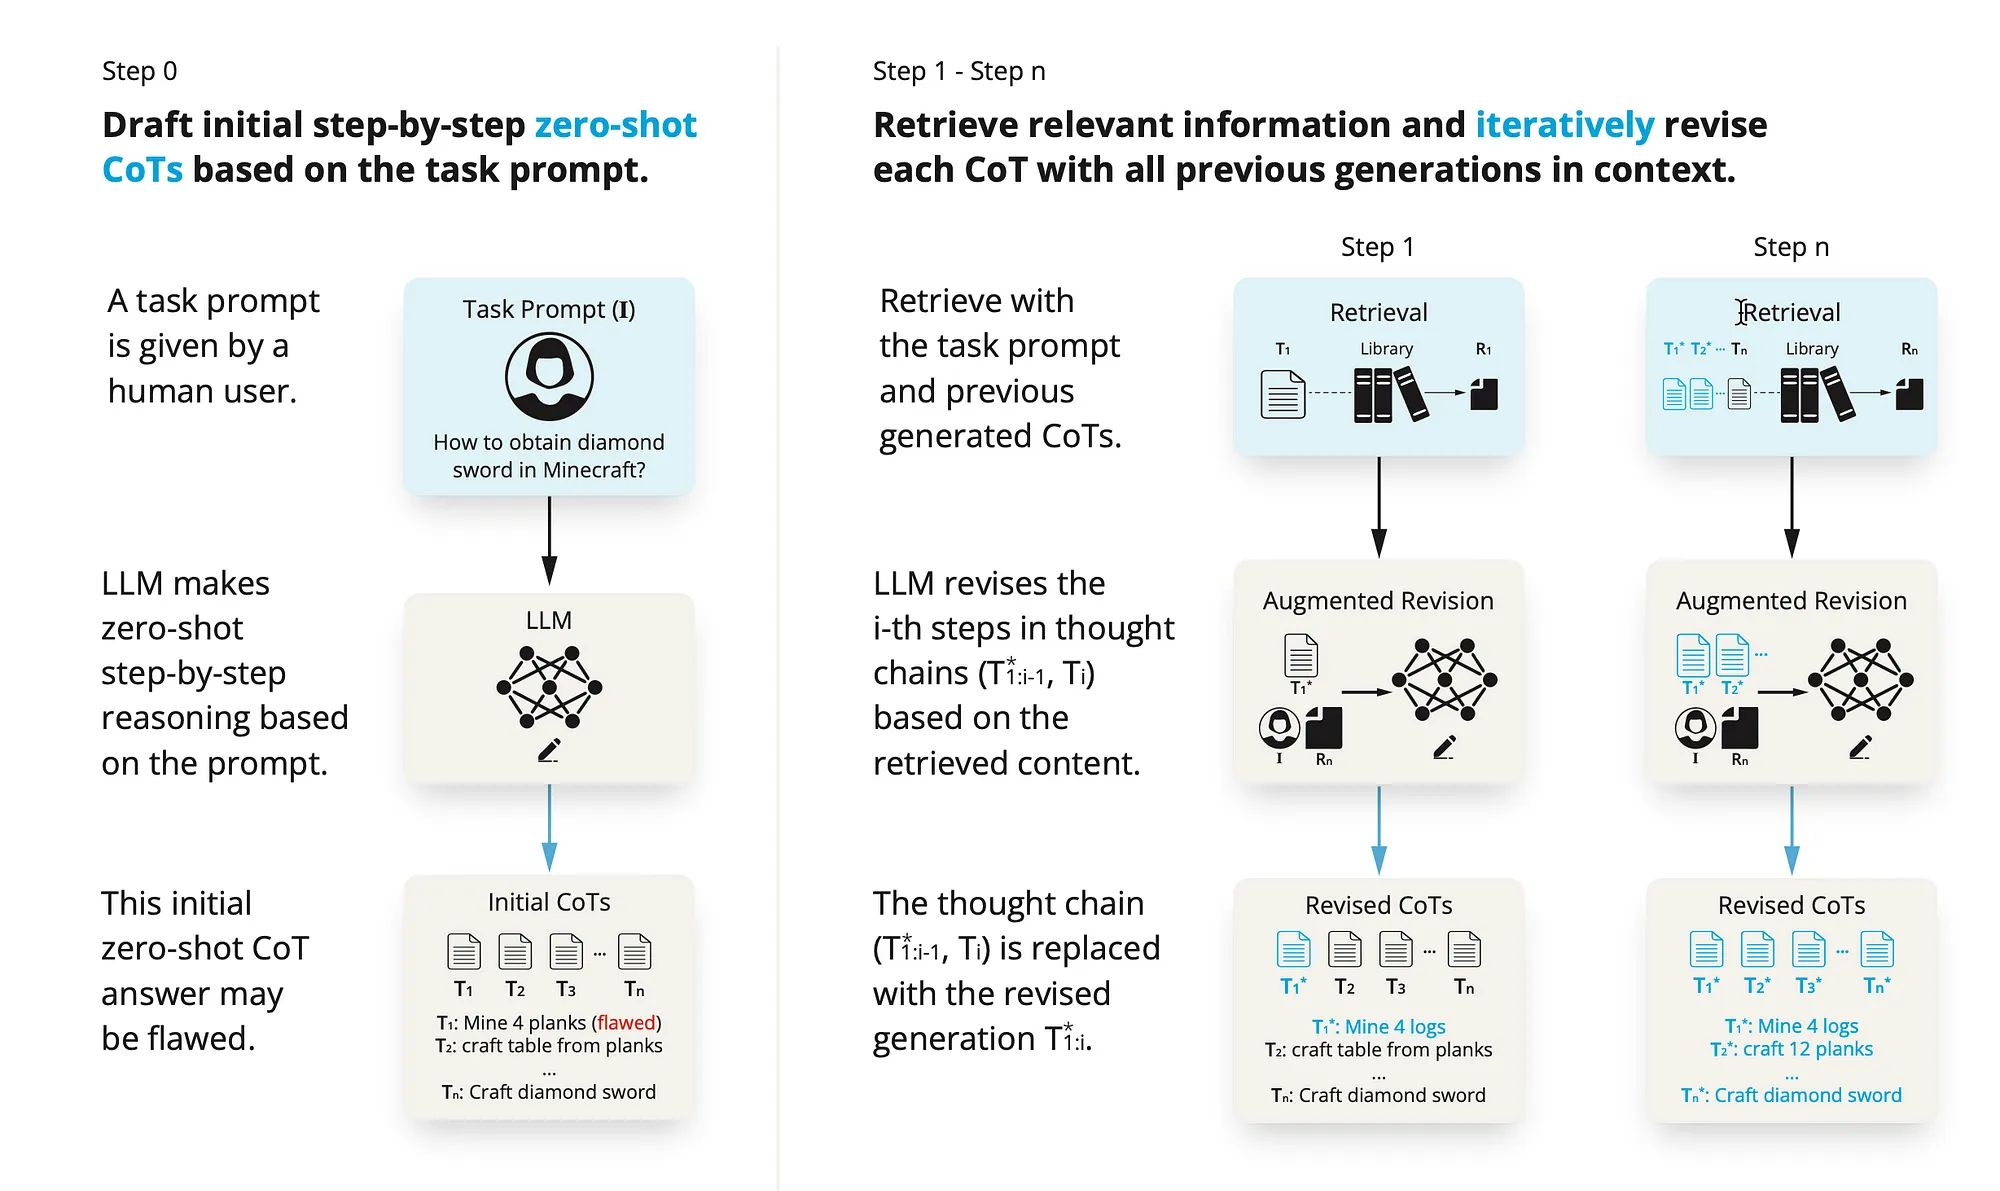weather in the city I'm visiting. I don't want to go when it's too hot or too cold."
    Thought 4: "Once I have the dates, I can start looking at flight prices and accommodations."
    Thought 5: "I should also research attractions and activities in the city to plan my itinerary."


Each of these thoughts prompts the next one, creating a chain that leads to a complete plan for your trip.

#Self Consistency Prompting:
This technique involves ensuring that your thoughts, beliefs, and actions align with each other. It's about maintaining consistency in your words and deeds, and in your internal and external expressions.

**Example: Let's say you believe in the importance of recycling for environmental conservation.**

    Thought 1: "I believe in recycling to protect the environment."
    Action 1: You separate your waste into recyclables and non-recyclables at home.
    Thought 2: "I should also encourage others to recycle."
    Action 2: You start a recycling initiative at your workplace and educate your colleagues about its importance.


In this case, your thoughts and actions are consistent with your belief in recycling. This self-consistency helps to reinforce your belief and make it a part of your behavior.

#In-context learning

In-context learning refers to a technique used to fine-tune or adapt a pre-trained language model to a specific task or domain by providing it with additional examples or context. This process allows the model to specialize and improve its performance on the target task without the need for extensive retraining from scratch.

In-context learning typically involves the following steps:

**Initialization**: Start with a pre-trained language model that has been trained on a large corpus of text data, such as OpenAI's GPT-3 or BERT.

**Fine-tuning**: Provide the model with examples or prompts related to the target task or domain. The model then adjusts its parameters to better fit these examples, while still retaining the knowledge learned during pre-training.

**Adaptation**: As the model is exposed to more examples and context related to the target task, it continues to refine its parameters to improve its performance on that task.

**Evaluation**: Periodically evaluate the model's performance on a separate validation set to ensure that it is learning the task effectively and not overfitting to the training examples.

In-context learning is particularly useful in scenarios where the target task or domain is different from the original pre-training data. By providing the model with relevant examples and context, it can quickly adapt to new tasks or domains with relatively little additional training data.

**Few-Shot Learning**: The LLMs are able to learn from the examples given to them, allowing them to handle more complicated tasks without the need for training or fine-tuning. This method is significantly less expensive than other options, as it only requires the cost of adding examples to each prompt. If your task can be solved just with few-shot learning, then it’s always the most efficient approach.

**Fine-Tuning**: If few-shot learning is not effective for your task, an alternative method is fine-tuning. This involves using some data points to create a task-specific model. Although finetuning can be challenging when acquiring new knowledge, it is more effective in adapting to different styles, and tones, or incorporating new vocabulary.

**Training From Scratch**: If fine-tuning is not effective, consider training a model from scratch with domain-specific data. However, this requires significant resources, such as cost, dataset availability, and expertise.

#Evaluation metrics for LLM performance

**Perplexity**: Language modeling, text generation, machine translation, speech recognition. Lower is better.

**HumanEval**: Evaluating coding and problem-solving capabilities.

**HellaSwa**: Assessing performance on subjective and open-ended questions, natural language interaction.

**ARC**: Evaluating reasoning capabilities, multi-step reasoning, combining information, drawing inferences.

**MMLU**: Comprehensive evaluation across various tasks, including natural language understanding, generation, and reasoning.

**TruthfulQA**: Assessing truthfulness and factual accuracy of responses.

#Pre-training and fine-tuning method:

#Pre-training Methods:

**1. Standard Language Model Pre-training (e.g. GPT, BERT, RoBERTa, T5):**
   - Use for general language understanding and generation tasks
   - Suitable for a wide range of downstream NLP tasks

**2. Multimodal Pre-training (e.g. CLIP, SimVLM, Flamingo):**
   - Use when dealing with multi-modal data like text, images, audio
   - Ideal for multimedia applications, multimodal interaction, medical imaging

**3. Code Pre-training (e.g. CodeBERT, CodeGPT, PLBART):**
   - Use for code understanding, generation, and analysis tasks
   - Tailored for software development, code review, refactoring

**4. Domain-Specific Pre-training (e.g. FinBERT, BioMedBERT, LegalBERT):**
   - Pre-train on domain-specific corpora like finance, healthcare, legal
   - Improves performance on domain-specific downstream tasks

#Fine-tuning Methods:

**1. Supervised Fine-tuning:**
   - Use when you have labeled task-specific data
   - Adapts pre-trained model to a particular downstream task

**2. Reinforcement Learning from Human Feedback (RLHF) (e.g. InstructGPT, Claude):**
   - Use to make model outputs more coherent, truthful, and aligned
   - Helps in open-ended generation while maintaining control

**3. Prompt-Based Fine-tuning (e.g. PaLM, GPT-3):**
   - Use when you have limited task data but can provide prompts
   - Efficient adaptation without full model fine-tuning

**4. Adopters (e.g. FLAN models):**
   - Use to rapidly adapt a pre-trained model to new domains/tasks
   - Combines pre-trained model with trainable domain adapters

**5. Instruct Tuning (e.g. InstructGPT models):**
   - Use to make pre-trained models better at following instructions
   - Improves performance on instruction-following tasks

**6. Mixture-of-Experts (e.g. MT-NLG, PALM):**
   - Use to combine multiple expert models for different sub-tasks
   - Enables more specialized and efficient modeling

**7. Multi-Task Fine-tuning (e.g. MultiTask from AllenNLP):**
   - Fine-tune on multiple related tasks simultaneously
   - Improves transfer learning and generalization

#Full Fine-tuning: Teacher-Student Architecture

Full fine-tuning refers to the traditional approach of fine-tuning a pre-trained language model on a specific task by updating all its parameters.

In the teacher-student architecture, a smaller student model is trained to mimic the behavior of a larger teacher model. The teacher model is first fine-tuned on the target task, and then the student model is trained to produce similar outputs as the teacher, using techniques like knowledge distillation.

**Fine-Tune technique :** The teacher model is a larger pre-trained model that is fine-tuned on the target task. The student model is a smaller, more efficient model that is trained to mimic the teacher's outputs using distillation techniques.

**Use case** : Full fine-tuning is useful when you have a large amount of task-specific data and computational resources. The teacher-student approach is beneficial when you need to deploy a smaller, more efficient model while retaining the performance of a larger model.

**Popular models:** GPT-3, BERT, RoBERTa, and other large pre-trained models are often used as teacher models, while smaller variants like DistilBERT, TinyBERT, and MobileBERT are used as student models.

#Adaptor Tuning: Single, Parallel, and Scaled Parallel

Adaptor tuning is a lightweight fine-tuning approach that introduces trainable adaptor modules to a pre-trained model, instead of updating all its parameters.

**Working:** Adaptor modules are small neural networks that are inserted into the pre-trained model's layers. During fine-tuning, only the adaptor modules are updated, while the pre-trained model's parameters remain frozen.

**Architecture:** There are three main architectures: Single (one adaptor module per layer), Parallel (multiple adaptor modules per layer), and Scaled Parallel (multiple adaptor modules with different sizes per layer).

**Use Case:** Adaptor tuning is beneficial when you have limited task-specific data, as it requires updating fewer parameters than full fine-tuning. It is also useful for quickly adapting a pre-trained model to multiple tasks or domains.

**Popular models:** BERT, RoBERTa, GPT-2, and other pre-trained models have been adapted using adaptor tuning for various tasks.

#Prefix Tuning

Prefix tuning is a method that introduces learnable prefix tokens to a pre-trained language model, instead of updating its parameters.

**Working:** A small number of prefix tokens are prepended to the input sequence and optimized during fine-tuning. The pre-trained model remains frozen, and the prefix tokens act as a conditioning mechanism to adapt the model's behavior.

**Architecture:** The pre-trained model remains unchanged, and a set of learnable prefix tokens is introduced before the input sequence.

**Use Case:** Prefix tuning is useful when you have limited task-specific data or when you want to rapidly adapt a pre-trained model to multiple tasks or domains without updating its parameters.

**Popular models:** GPT-2, GPT-3, T5, and other large language models have been adapted using prefix tuning for various tasks.

#PEFT (Parameter-Efficient Fine-Tuning): LoRA (Low-Rank Adaptation)

PEFT is a family of techniques that introduce trainable low-rank matrices or tensors to a pre-trained model, instead of updating all its parameters.

**Working:** LoRA, short for Low-Rank Adaptation, is a specific PEFT method that introduces low-rank matrices to the pre-trained model's layers. During fine-tuning, only these low-rank matrices are updated, while the pre-trained model's parameters remain frozen.

**Architecture:** The pre-trained model remains unchanged, and trainable low-rank matrices or tensors are introduced at specific layers.

**Use Case:** PEFT and LoRA are beneficial when you have limited task-specific data or computational resources, as they require updating fewer parameters than full fine-tuning.

**Popular models:** LoRA has been applied to BERT, GPT-2, GPT-3, and other pre-trained models for various tasks.

#Instruction Tuning

Instruction tuning is a technique that fine-tunes a pre-trained language model to better follow instructions or prompts for a specific task.

**Working :** The pre-trained model is fine-tuned on a dataset of instructions and corresponding outputs for the target task. This teaches the model to understand and follow instructions more effectively.

**Architecture:** The pre-trained model remains unchanged, and fine-tuning is performed using a dataset of instructions and expected outputs.

**Use Case:** Instruction tuning is useful when you want to adapt a pre-trained model to follow instructions more accurately for tasks like question answering, task completion, or few-shot learning.

**Popular models:** InstructGPT, GPT-3, PaLM, and other large language models have been instruction-tuned for various tasks.

#RLHF (Reinforcement Learning from Human Feedback)

RLHF is a technique that fine-tunes a pre-trained language model using human feedback and reinforcement learning, to improve the quality and alignment of its outputs.

**Working:** The pre-trained model generates outputs, which are then rated or scored by human annotators. These scores are used as rewards in a reinforcement learning setup to fine-tune the model to produce better outputs.

**Architecture:** The pre-trained model remains unchanged, and fine-tuning is performed using a reinforcement learning algorithm and human feedback scores.

**Use Case:** RLHF is useful when you want to improve the coherence, truthfulness, and alignment of a pre-trained model's outputs, especially for open-ended generation tasks.

**Popular models:** InstructGPT, Claude (Anthropic), and other language models have been fine-tuned using RLHF for improved output quality and alignment.

# Tools,Frameworks,Platform

**I. Affordable GPU Compute:**

Vast.ai - Provides managed GPU instances and spot instances at lower costs.

**II. Safe and Ethical LLM Development:**
1. Anthropic's Constitutional AI - Enables training safe, reliable, and truthful LLMs.

**III. Vector Databases and Semantic Search:**
1. Pinecone - Industry-leading vector database for efficient similarity search.
2. Weaviate - Open-source vector search engine and database.

**IV. Question Answering (QA) Systems:**
1. Haystack - Comprehensive open-source framework for building QA systems.
2. LangChain - Flexible framework for building LLM applications, including QA.

**V. End-to-End LLM Platforms:**
1. Hugging Face - Most popular open-source platform for LLM development and deployment.
2. AWS SageMaker - Robust cloud platform for LLM training, tuning, and scalable inference.
3. Comet.ml - Experiment management and model tracking platform.

**VI. LLM Deployment and Hosting:**
1. Replicate - Platform for deploying, sharing, and scaling LLM models.

**VII. Experiment Tracking and Collaboration:**
1. Weights & Biases - Widely used for tracking experiments, metrics, and collaborative work.

In terms of cost, Vast.ai and open-source tools like Weaviate, Haystack, and LangChain are likely to be more cost-effective options, especially for smaller teams or individual developers.

Platforms like Hugging Face, AWS SageMaker, and Replicate may have higher costs associated with their hosted services and enterprise features, but they offer more comprehensive and scalable solutions for larger organizations or production-level deployments.



#Reinforcement Learning from Human Feedback (RLHF)


**Training Process**

    1. Optional finetuning of the LLM by following instructions.
    2. Creation of RLHF dataset by generating text completions from instructions.
    3. Collecting human feedback by ranking completions based on various aspects.
    4. Training a reward model to assign scores to completions based on human feedback.
    5. Fine-tuning the LLM using reinforcement learning and the reward model to produce higher-scored completions.

**Comparison with SFT**


RLHF better for teaching "human alignment" aspects with large, high-quality datasets but more expensive and time-consuming.

RLHF's results sensitive to parameters and hyperparameters, prone to local optima, and divergent losses.

SFT simpler, especially with LoRA, but may lack effectiveness in complex alignment tasks.

#Alternatives to RLHF

**Direct Preference Optimization (DPO)::**
Directly optimizes LLM using binary cross-entropy loss without complex RL techniques or reward models.

Simplifies fine-tuning process by optimizing LLM on preference data directly.

Transforms RL loss into a loss over reference model, optimizing for human preferences.

**Reinforced Self-Training (ReST)**

Operates cyclically with 'Grow' and 'Improve' steps:

    1. 'Grow' step generates predictions to augment dataset.
    2. 'Improve' step ranks and filters dataset using a reward model, fine-tuning LLM.

Reduces computational load compared to RLHF and allows easy inspection of data quality.

**Reinforcement Learning from AI Feedback (RLAIF)**

Uses AI Feedback Model instead of human feedback for training AI assistant.

Creates dataset of ranked preferences automatically, training Reward Model for reinforcement learning.


**Conclusion**

RLHF offers significant benefits but is complex and resource-intensive. Alternatives like DPO, ReST, and RLAIF address some limitations of RLHF, providing simpler, more cost-effective, and scalable approaches for training LLMs.

# Eficient LLM Deployment

### **Quantization**:
Quantization involves reducing the precision of model parameters (weights and biases) and activations from 32-bit floating-point representation to lower bit-widths, such as 8-bit or even lower. This can significantly reduce the model size and computational requirements.

**Different quantization methods include**:

**Post-training quantization**: The pre-trained model is quantized after training, without any fine-tuning.

**Quantization-aware training**: The model is trained with simulated quantization during the training process, allowing it to adapt to the quantized representation.

**Mixed-precision quantization**: Different parts of the model are quantized to different bit-widths based on their sensitivity to quantization noise.

###**Pruning**:
Pruning involves removing redundant or less important weights and activations from the model.

**There are various pruning techniques**:

**Weight pruning**: Unstructured weight pruning removes individual weights based on their magnitude or importance scores, while structured pruning removes entire filters, channels, or blocks.

**Activation pruning**: This technique prunes unnecessary activations during inference, which can be particularly effective for Transformer-based LLMs.

**Iterative pruning**: The model is pruned and fine-tuned iteratively, with the pruning threshold gradually increasing.

###**Knowledge Distillation**:
Knowledge distillation is a model compression technique where a smaller student model is trained to mimic the behavior of a larger teacher model. This allows transferring the knowledge from the larger model to a more compact and efficient model.

###**Low-rank Factorization**:
This method involves approximating the weight matrices of the model using low-rank matrix factorization techniques, such as singular value decomposition (SVD). This can significantly reduce the number of parameters while maintaining reasonable accuracy.

###**Architecture Search**:
Neural architecture search (NAS) techniques can be used to automatically explore and discover compact and efficient model architectures tailored for specific tasks or deployment constraints.

###**Efficient Attention Mechanisms**:
For Transformer-based LLMs, developing more efficient attention mechanisms, such as sparse attention, reformer attention, or linformer attention, can significantly reduce the computational complexity and memory requirements.

###**Model Parallelism and Sharding**:
Techniques like model parallelism and sharding can distribute the model across multiple devices or processors, allowing for more efficient utilization of computational resources and memory.

###**Tokenization and Subword Regularization**:
Optimizing the tokenization and subword regularization strategies can lead to more compact and efficient representations of the input text, reducing the computational overhead for LLMs.

#Future of LLM research and deployment

**1. Multimodal LLMs**
   - Combining text, images, audio, video data
   - Models like CLIP, ALIGN, Flamingo, Kosmo-1
   - Challenges in aligning multimodal representations

**2. Scaling Laws for LLM Training**
   - Optimal scaling of model size and dataset size
   - Power law scaling of performance
   - Theoretical understanding of scaling properties

**3. Advanced Prompting Frameworks**
   - ReAct framework for open-ended task decomposition  
   - Prompting for multi-step reasoning and task composition
   - ChatGPT plugins and integrations

**4. Training on Generated Data**
   - Self-training, data augmentation using generation
   - Challenges like model collapse, compounding errors
   - Safe deployment, filtering, and curation strategies

**5. Expanding Context Window**
   - FlashAttention, Sparse Transformers
   - Algorithms like ALiBi for efficient long-range attention
   - Efficient scaling of context length

**6. Retrieval-Augmented LLMs**
   - Integrating external knowledge sources
   - Retrieval-augmented architectures like RAG, REALM
   - Open-domain question answering

**7. Federated and Privacy-Preserving LLMs**
   - Training across decentralized data sources  
   - Differential privacy, secure aggregation techniques
   - Deployments with stronger privacy guarantees

**8. LLM Compression and Hardware Acceleration**  
   - Quantization, pruning, knowledge distillation
   - Specialized hardware like TPUs, efficient inference
   - Enabling on-device deployment

**9. Compositional and Modular LLM Architectures**
   - Composing skills and capabilities
   - Modular task-specific experts or components  
   - Few-shot learning across diverse tasks

**10. Robustness and Safety of LLMs**
    - Adversarial attacks and defenses
    - Controlling for biases, toxicity, and harmful outputs
    - Transparency, interpretability, and auditing

**11. Efficient Pre-Training and Fine-Tuning**
    - Data/compute efficient pre-training objectives  
    - Prompt/soft prompt tuning, P-tuning
    - Continual learning, iterative refinement

**12. Grounded and Embodied LLMs**
    - Connecting language to perception and actions
    - Sim2real transfer, physical embodiment
    - Instruction following, grounded task completion



#AI Agent

# Large Multimodal



https://learn.activeloop.ai/